In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_movies = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\New Folder\movies.csv")
df_ratings = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\New Folder\ratings.csv")
df_links = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\New Folder\links.csv")
df_tags = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\New Folder\tags.csv")

In [6]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [7]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [8]:
df_links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [9]:
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


### QUESTION & ANSWERS

#### 1.Download the data from the above link. How many ".csv" files are available in the dataset?

There are '4' .csv files.

#### 2.What is the shape of "movies.csv"?

In [10]:
df_movies.shape

(9742, 3)

df_movies dataset contains 9742 rows & 3 columns.

#### 3.What is the shape of "ratings.csv"?

In [13]:
df_ratings.shape

(100836, 4)

It contains 100836 rows & 4 columns

#### 4.How many unique "userId" are available in "ratings.csv"?

In [14]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [15]:
df_ratings["userId"].nunique()

610

#### 5.Which movie has recieved maximum number of user ratings?


In [16]:
df_movies.merge(df_ratings , on = 'movieId' , how = 'inner')

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [17]:
max_rated_movie = df_movies.merge(df_ratings , on = 'movieId' , how = 'inner').groupby('title')['rating'].count()

In [18]:
max_rated_movie.idxmax()

'Forrest Gump (1994)'

#### 6.Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

In [19]:
df = df_movies.merge(df_tags , on = 'movieId' , how = 'inner')

In [20]:
df

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [21]:
df.loc[df['title'].str.contains('Matrix'),'title'] = 'Matrix,The movie(1999)'

In [22]:
tags  = df[df['title'] == 'Matrix,The movie(1999)']['tag'].reset_index()

In [23]:
tags

,index,tag
0,1313,martial arts
1,1314,sci-fi
2,1315,alternate universe
3,1316,philosophy
4,1317,post apocalyptic


#### 7.What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [24]:
average_ratings = df_movies.merge(df_ratings, on ='movieId' , how = 'inner').groupby('title')['rating'].mean()

In [25]:
average_ratings

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [26]:
average_ratings["Terminator 2: Judgment Day (1991)"]

3.970982142857143

In [27]:
round(average_ratings["Terminator 2: Judgment Day (1991)"],2)

3.97

#### 8.How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [28]:
df = df_movies.merge(df_ratings, on ='movieId' , how = 'inner')

In [29]:
df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [30]:
df.loc[df['title'].str.contains('fight club', case=False),'title'] = 'Fight Club (1999)'

In [31]:
# df[df['title'] == 'Fight Club (1999)']

In [32]:
df1 = df[df['title']=="Fight Club (1999)"]['rating']

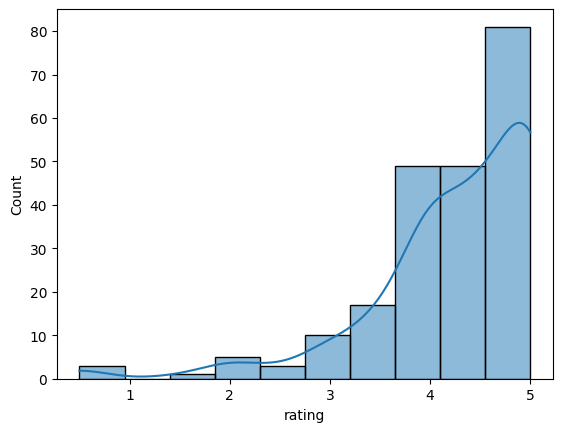

In [33]:
sns.histplot(df1,bins=10,edgecolor='black',kde= True)
plt.show()

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

In [35]:
df = df_ratings.groupby('movieId')['rating'].agg(['count' , 'mean'])

In [36]:
df

,count,mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [37]:
grouped_df = df.rename(columns={'count' : 'rating_count' , 'mean' : 'average_rating'})

In [38]:
grouped_df

,rating_count,average_rating
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [39]:
filtered_movies = df_movies.merge(grouped_df , on = 'movieId' , how = 'inner')
# ['rating_count']>50

In [40]:
filtered_movies = filtered_movies[filtered_movies['rating_count'] > 50]

In [41]:
filtered_movies

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


#### 9.Which movie is the most popular based on  average user ratings?

In [42]:
filtered_movies.sort_values(by = 'average_rating' ,ascending = False).head(5)

,movieId,title,genres,rating_count,average_rating
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
659,858,"Godfather, The (1972)",Crime|Drama,192,4.289062
2224,2959,Fight Club (1999),Action|Crime|Drama|Thriller,218,4.272936
974,1276,Cool Hand Luke (1967),Drama,57,4.271930
602,750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97,4.268041


#### 10.Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [43]:
filtered_movies.sort_values(by = 'rating_count' ,ascending = False).head(5)

,movieId,title,genres,rating_count,average_rating
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


#### 11.Which Sci-Fi movie is "third most popular" based on the number of user ratings?

In [44]:
filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi' ,case= False)].sort_values(by='rating_count' ,ascending= False)\
.iloc[2].reset_index()

,index,418
0,movieId,480
1,title,Jurassic Park (1993)
2,genres,Action|Adventure|Sci-Fi|Thriller
3,rating_count,238
4,average_rating,3.75


In [45]:
filtered_movies

,movieId,title,genres,rating_count,average_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [ ]:
# import requests
# import numpy as np
# from bs4 import BeautifulSoup

# def scrapper(imdbId):
#     id = str(int(imdbId))
#     n_zeroes = 7 - len(id)
#     new_id = "0" * n_zeroes + id
#     URL = f"https://www.imdb.com/title/tt{new_id}/"
#     request_header = {'Content-Type': 'text/html; charset=UTF-8',
#                       'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
#                       'Accept-Encoding': 'gzip, deflate, br'}

#     # Use the 'get' method for making a GET request to the URL
#     response = requests.get(URL, headers=request_header)

#     # Use the 'html.parser' for BeautifulSoup
#     soup = BeautifulSoup(response.text, 'html.parser')

#     # Find the IMDb rating using the appropriate tag and attribute
#     imdb_rating = soup.find('span', attrs={'span', itemprop='ratingValue')

#     return imdb_rating.text.strip() if imdb_rating else np.nan

# # Example usage
# imdbId = "1234567"  # Replace with your IMDb ID
# rating = scrapper(imdbId)
# print(f"IMDb Rating: {rating}")


In [49]:
merged_data2 = pd.merge(df_movies, df_links, on = 'movieId')
merged_data2.head()

merged_data2.loc[merged_data2['imdbId'].idxmax(), 'movieId']

193587

In [50]:
z = merged_data2[merged_data2['genres'].str.contains('Sci-Fi', case=False)]
high_sci_fi = z['imdbId'].max()

z.loc[z['imdbId'] == high_sci_fi, 'movieId'].values[0]

179053